Carga de Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
from urllib.request import urlopen
from mplsoccer import Pitch, FontManager, VerticalPitch, add_image
from PIL import Image

In [125]:
fuente1=FontManager('https://github.com/google/fonts/blob/main/ofl/abeezee/ABeeZee-Regular.ttf?raw=true')

Carga de dataframe

In [131]:
partido_inicial=pd.read_csv('gevpsitasfinal.csv')

# Convertir las columnas a tipo numérico
partido_inicial['Player'] = partido_inicial['Player'].str.strip()
partido_inicial['Y'] = pd.to_numeric(partido_inicial['Y'], errors='coerce')
partido_inicial['X2'] = pd.to_numeric(partido_inicial['X2'], errors='coerce')
partido_inicial['Y2'] = pd.to_numeric(partido_inicial['Y2'], errors='coerce')

# Definir los valores mínimos y máximos de X en ambas escalas
x1, x2 = 0, 100  # Escala original de X
new_x1, new_x2 = 0, 28  # Nueva escala de X

# Definir los valores mínimos y máximos de Y en ambas escalas
y1, y2 = 0, 100  # Escala original de Y
new_y1, new_y2 = 16, 0  # Nueva escala de Y

# Calcular la coordenada transformada de Y y sobrescribir la columna 'Y' con el resultado
partido_inicial['Y'] = ((new_y2 - new_y1) / (y2 - y1)) * partido_inicial['Y']*-1
partido_inicial['Y2'] = ((new_y2 - new_y1) / (y2 - y1)) * partido_inicial['Y2']*-1
# Calcular la coordenada transformada de X y sobrescribir la columna 'X' con el resultado
partido_inicial['X'] = ((new_x2 - new_x1) / (x2 - x1)) * partido_inicial['X'] 
partido_inicial['X2'] = ((new_x2 - new_x1) / (x2 - x1)) * partido_inicial['X2'] 


# Filtrar las filas donde Mins > 55 (entretiempo)
partido_rotado = partido_inicial[partido_inicial['Mins'] > 55].copy()

# Transformar las coordenadas X, Y, X2 y Y2 para las filas donde Mins > 55
partido_rotado['X'] = 28 - partido_rotado['X']
partido_rotado['X2'] = 28 - partido_rotado['X2']
partido_rotado['Y'] = 16 - partido_rotado['Y']
partido_rotado['Y2'] = 16 - partido_rotado['Y2']

# Combinar las filas transformadas con las filas originales donde Mins <= 55
partido = pd.concat([partido[partido['Mins'] <= 55], partido_rotado])


partido_gevp = partido[(partido['Team'] == 'GEVP')]
partido_sitas = partido[(partido['Team'] == 'SITAS')]
# Mostrar las últimas filas del DataFrame combinado
print(partido.head(120))

      Team Player   Event  Mins  Secs      X      Y     X2     Y2
0    SITAS      2    Pase    27     5   3.08  11.20   7.84   3.36
1    SITAS      4    Pase    27     7   7.56   2.72   8.12   7.52
2    SITAS     10    Pase    27     8   8.68   7.84   8.12  14.56
3    SITAS      2    Pase    27    10   6.16  15.04  17.08   9.92
4    SITAS     11    Pase    27    12  17.36  11.04  14.28   7.84
..     ...    ...     ...   ...   ...    ...    ...    ...    ...
115  SITAS      2    Pase    30    50  10.64  14.08  17.36  12.96
116  SITAS     11    Pase    30    51  19.32  13.76  14.00   7.52
117  SITAS      7    Pase    30    53  15.40   7.84  18.20   2.88
118  SITAS      6    Pase    30    54  17.64   2.24  21.84   4.80
119  SITAS     10  Errado    30    56  23.52   5.76    NaN    NaN

[120 rows x 9 columns]


In [37]:
# Filtrar el DataFrame para excluir los eventos 'sub_in' y 'sub_out'
df_player = partido[(partido['Team'] == 'GEVP') & 
                   # (partido['Player'] == '10') & 
                    (~partido['Event'].isin(['sub_in', 'sub_out']))]

# Mostrar el DataFrame resultante
df_player


,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
8,GEVP,12,Recupero,27,18,15.96,13.76,NaN,NaN
9,GEVP,12,Pase,27,18,15.40,12.80,9.80,14.88
10,GEVP,11,Pase,27,21,8.68,14.24,4.20,9.92
11,GEVP,5,Perdida,27,25,4.76,10.88,NaN,NaN
18,GEVP,5,Recupero,27,37,17.36,5.28,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1366,GEVP,5,Pase,93,31,8.40,1.44,12.88,10.56
1367,GEVP,12,Pase,93,32,12.88,9.92,9.80,6.56
1368,GEVP,2,Pase,93,34,8.68,6.08,5.88,13.60
1369,GEVP,5,Pase,93,34,5.60,13.60,9.24,12.64


In [162]:
#jugadora destacadas gevp
dest_gevp = df_player = partido[(partido['Team'] == 'GEVP') & 
                    (partido['Player'] == '11') ]

goles_dest_gevp =1+dest_gevp.loc[(partido['Event'] == 'Gol'), 'Event'].count()
pases_dest_gevp=dest_gevp.loc[(partido['Event'] == 'Pase'), 'Event'].count()
rebotes_dest_gevpo =  dest_gevp.loc[(partido['Event'] == 'reb_of'), 'Event'].count() 
rebotes_dest_gevpd =  dest_gevp.loc[(partido['Event'] == 'reb_def'), 'Event'].count() 
rebotes_dest_gevp = rebotes_dest_gevpd + rebotes_dest_gevpo
tiros_dest_gevp = goles_dest_gevp + dest_gevp.loc[(partido['Event'] == 'Errado'), 'Event'].count()
tiros_dest_gevp


lista_estadisticas_gevp=['goles_dest_gevp','pases_dest_gevp','rebotes_dest_gevp','tiros_dest_gevp']

In [163]:
#jugadora destacadas sitas

dest_sitas = df_player = partido[(partido['Team'] == 'SITAS') & 
                    (partido['Player'] == '11') ]

goles_dest_sitas =2+dest_sitas.loc[(partido['Event'] == 'Gol'), 'Event'].count()
pases_dest_sitas=dest_sitas.loc[(partido['Event'] == 'Pase'), 'Event'].count()
rebotes_dest_sitaso =  dest_sitas.loc[(partido['Event'] == 'reb_of'), 'Event'].count() 
rebotes_dest_sitasd =  dest_sitas.loc[(partido['Event'] == 'reb_def'), 'Event'].count() 
rebotes_dest_sitas = rebotes_dest_sitasd + rebotes_dest_sitaso
tiros_dest_sitas = goles_dest_sitas + dest_sitas.loc[(partido['Event'] == 'Errado'), 'Event'].count()
rebotes_dest_sitas

lista_estadisticas_sitas=['goles_dest_sitas','pases_dest_sitas','rebotes_dest_sitas','tiros_dest_sitas']

In [195]:
# Supongamos que tu DataFrame se llama 'partido' y está ordenado cronológicamente

# Identificar los índices de los eventos 'Gol' de equipos que no sean 'GEVP'
gol_indices_sitas = partido[(partido['Event'] == 'Gol') & (partido['Team'] != 'GEVP')].index

# Identificar los índices de los eventos 'Pase' que siguen a un evento 'Gol' del paso anterior
pase_indices_to_remove = [i + 1 for i in gol_indices if i + 1 in partido.index and partido.loc[i + 1, 'Event'] == 'Pase']

# Crear un nuevo DataFrame excluyendo los eventos 'Pase' identificados
df_filtered = partido.drop(pase_indices_to_remove)

# Si deseas aplicar esta lógica solo a los datos filtrados iniciales
df_player_gevp = df_filtered[(df_filtered['Team'] == 'GEVP') &
                         (df_filtered['Player'] == '11') & 
                         (~partido['Event'].isin(['sub_in', 'sub_out']))]  

# Mostrar el DataFrame resultante
df_player


,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
4,SITAS,11,Pase,27,12,17.36,11.04,14.28,7.84
13,SITAS,11,Pase,27,31,5.88,12.32,8.12,2.08
17,SITAS,11,Perdida,27,37,17.64,1.76,NaN,NaN
29,SITAS,11,Pase,27,59,15.40,8.00,18.20,13.92
31,SITAS,11,Perdida,28,4,22.40,7.04,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1301,SITAS,11,Pase,90,30,7.28,8.96,19.04,1.60
1303,SITAS,11,Pase,90,38,19.32,7.52,21.00,13.12
1317,SITAS,11,Gol,91,25,22.96,7.52,NaN,NaN
1332,SITAS,11,Foul,92,2,7.56,3.84,NaN,NaN


In [196]:
# Supongamos que tu DataFrame se llama 'partido' y está ordenado cronológicamente

# Identificar los índices de los eventos 'Gol' de equipos que no sean 'GEVP'
gol_indices_sitas = partido[(partido['Event'] == 'Gol') & (partido['Team'] != 'SITAS')].index

# Identificar los índices de los eventos 'Pase' que siguen a un evento 'Gol' del paso anterior
pase_indices_to_remove = [i + 1 for i in gol_indices_sitas if i + 1 in partido.index and partido.loc[i + 1, 'Event'] == 'Pase']

# Crear un nuevo DataFrame excluyendo los eventos 'Pase' identificados
df_filtered = partido.drop(pase_indices_to_remove)

# Si deseas aplicar esta lógica solo a los datos filtrados iniciales
df_player_sitas = df_filtered[(df_filtered['Team'] == 'SITAS') &
                         (df_filtered['Player'] == '11') & 
                         (~partido['Event'].isin(['sub_in', 'sub_out']))]  

# Mostrar el DataFrame resultante
df_player_sitas


,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
4,SITAS,11,Pase,27,12,17.36,11.04,14.28,7.84
13,SITAS,11,Pase,27,31,5.88,12.32,8.12,2.08
17,SITAS,11,Perdida,27,37,17.64,1.76,NaN,NaN
29,SITAS,11,Pase,27,59,15.40,8.00,18.20,13.92
31,SITAS,11,Perdida,28,4,22.40,7.04,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1301,SITAS,11,Pase,90,30,7.28,8.96,19.04,1.60
1303,SITAS,11,Pase,90,38,19.32,7.52,21.00,13.12
1317,SITAS,11,Gol,91,25,22.96,7.52,NaN,NaN
1332,SITAS,11,Foul,92,2,7.56,3.84,NaN,NaN


In [204]:
def generar_mapa_calor(dataframe, minuto_inicial, minuto_final, ax):
    
    minutes =  dataframe[(dataframe['Mins'] >= minuto_inicial) & (dataframe['Mins'] <= minuto_final)]
    
    pitch=Pitch()
    
    pitch.kdeplot(
        minutes['Y'],
        minutes['X'],
        ax=ax,
        levels=100,
        fill=True,
        zorder=0,
        shade_lowest=True,
        cmap='Reds')

    
   # Definir las dimensiones del campo
    ancho = 16
    alto = 28

    
    # Dibujar el rectángulo del campo (fondo naranja)
    ax.add_patch(plt.Rectangle((0, 0), ancho, alto, fill=True, color='white', alpha=0.1))

    # Dibujar las líneas de la cancha
    ax.plot([0, ancho], [0, 0], color='black', linewidth=2)  # Línea de fondo
    ax.plot([0, ancho], [alto, alto], color='black', linewidth=2)  # Otra línea de fondo
    ax.plot([0, ancho], [alto/2, alto/2], color='black', linewidth=1)  # Línea central
    ax.plot([0, 0], [0, alto], color='black', linewidth=2)  # Línea lateral izquierda
    ax.plot([ancho, ancho], [0, alto], color='black', linewidth=3)  # Línea lateral derecha


    # Dibujar lineas de penal

    ax.plot( [7.5, 8.5],[ (alto /2)*1.33,  (alto /2)*1.33], color='black', linewidth=2)  # Línea penal
    ax.plot( [7.5, 8.5],[ (alto /2)*0.66,  (alto/2 )*0.66], color='black', linewidth=2)  # Línea penal

    #Aros

    ax.add_patch(plt.Circle((ancho/2 , (alto /2)*1.66), radius=0.5, fill=False, color='red', linewidth=2))
    ax.add_patch(plt.Circle((ancho/2 , (alto/2 )*0.33), radius=0.5, fill=False, color='red', linewidth=2))

    #Circulo de rebote

    ax.add_patch(plt.Circle((ancho/2 , (alto /2)*1.66), radius=2, fill=False, color='black', linewidth=2, linestyle='--'))
    ax.add_patch(plt.Circle((ancho/2 , (alto/2 )*0.33), radius=2, fill=False, color='black', linewidth=2, linestyle='--'))


    # Configurar los ejes
    ax.set_xlim(0, ancho)
    ax.set_ylim(0, alto)
    ax.set_aspect('equal')
    plt.axis('OFF')  # Ocultar ejes

   
    TITLE_TEXT = f'Min {minuto_inicial}-{minuto_final}'
   # text2 = f'Jugadora N°{df_player['Player'].iloc[0]}'
    #ax.text(0, 25, TITLE_TEXT, color='#c7d5cc', va='center', ha='center', fontsize=16)
  #  ax.text(0, 30, text2, color='#c7d5cc', va='center', ha='center', fontsize=18)

In [137]:

# Filtrar las filas donde el equipo sea "GEVP"
goles_gevp = 1+partido.loc[(partido['Team'] == 'GEVP') & (partido['Event'] == 'Gol'), 'Event'].count()
goles_sitas = 1+partido.loc[(partido['Team'] == 'SITAS') &
                            #(partido['Player'] == '11') &  
                            (partido['Event'] == 'Gol'), 'Event'].count()

goles_sitas

43

In [115]:
def sacar_spines(ax):
    ax.spines[['top', 'right', 'bottom','left']].set_visible(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

In [85]:


imagen1 = Image.open("sitas_escudo.jpg")
imagen2 = Image.open("gevp_imagen.png")

"ax12 = fig.add_subplot(gs[3:4,5:])\nax12.set_title('[3:4,5:]')"

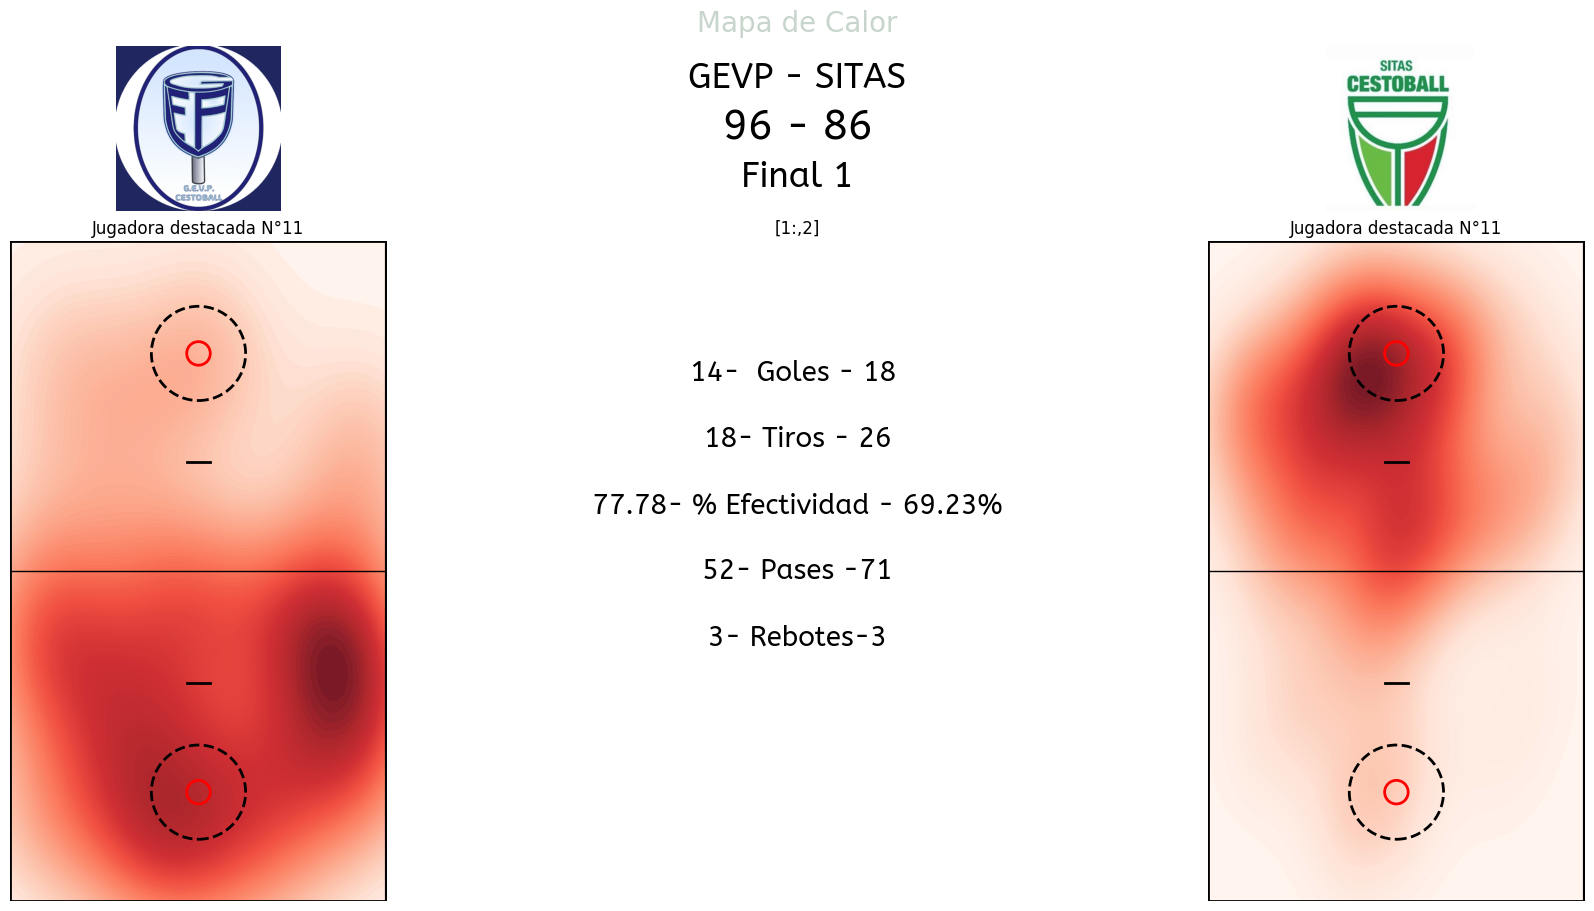

In [213]:
fig = plt.figure(figsize=(16,9),constrained_layout=True)
# Agregar un título a la figura
fig.suptitle('Mapa de Calor', fontsize=20, color='#c7d5cc')
gs = fig.add_gridspec(nrows=5,ncols=4)
fig.set_facecolor('white')

ax1 = fig.add_subplot(gs[0,0:1])

ax1.imshow(imagen2)
sacar_spines(ax1)

ax2 = fig.add_subplot(gs[0,3:4])
ax2.imshow(imagen1)
sacar_spines(ax2)


ax3 = fig.add_subplot(gs[0,1:3])
ax3.text(.5,.8, f'GEVP - SITAS', fontproperties=fuente1.prop, size=25, ha='center', va='center' )
ax3.text(.5,.5, f'{goles_gevp*2} - {goles_sitas*2}', fontproperties=fuente1.prop, ha='center', va='center', size=30 )
ax3.text(.5,.2, f'Final 1',  ha='center', va='center', fontproperties=fuente1.prop, size=25)

sacar_spines(ax3)


#lista_estadisticas_gevp=['goles_dest_gevp','pases_dest_gevp','rebotes_dest_gevp','tiros_dest_gevp']
#values_gevp = dest_gevp[lista_estadisticas_gevp].values
ax6 = fig.add_subplot(gs[1:,:1])
ax6.set_title('Jugadora destacada N°11')
sacar_spines(ax6)





generar_mapa_calor(df_player_gevp, 26, 100,ax6)

ax7 = fig.add_subplot(gs[1:,1:3])
ax7.set_title('[1:,2]')
sacar_spines(ax7)
ax7.text(.5,.8, f'{goles_dest_gevp}-  Goles - {goles_dest_sitas} ', fontproperties=fuente1.prop,  ha='center', va='center', size=20) 
ax7.text(.5,.7, f'{tiros_dest_gevp}- Tiros - {tiros_dest_sitas}',fontproperties=fuente1.prop, ha='center', va='center', size=20)
ax7.text(.5, .6, f'{round((goles_dest_gevp / tiros_dest_gevp) * 100, 2)}- % Efectividad - {round((goles_dest_sitas / tiros_dest_sitas) * 100, 2)}%', fontproperties=fuente1.prop, ha='center', va='center', size=20)
ax7.text(.5,.5, f'{pases_dest_gevp}- Pases -{pases_dest_sitas}', fontproperties=fuente1.prop, ha='center', va='center', size=20)
ax7.text(.5,.4, f'{rebotes_dest_gevp}- Rebotes-{rebotes_dest_sitas}' , fontproperties=fuente1.prop, ha='center', va='center', size=20)


ax8 = fig.add_subplot(gs[1:,3:])
ax8.set_title('Jugadora destacada N°11')
sacar_spines(ax8)

generar_mapa_calor(df_player_sitas, 26, 100,ax8)


"""ax10 = fig.add_subplot(gs[4:,5:])
ax10.set_title('[4:,5:]')"""



"""ax12 = fig.add_subplot(gs[3:4,5:])
ax12.set_title('[3:4,5:]')"""




In [ ]:
#